In [409]:
import numpy as np

In [411]:
import pandas as pd

In [413]:
import matplotlib.pyplot as plt

In [415]:
import seaborn as sns

In [417]:
train_df = pd.read_csv("train.csv")

In [419]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [423]:
test_df = pd.read_csv("test.csv")

In [425]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [427]:
#  Basic info about data set
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nFirst 10 columns in train set:")
print(train_df.columns[:10].tolist())

print("\nTop 10 columns with missing values:")
missing = train_df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0].head(10))


Train shape: (1460, 81)
Test shape: (1459, 80)

First 10 columns in train set:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']

Top 10 columns with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


In [429]:
print('SalePrice' in train_df.columns)

True


In [431]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [433]:
train_df = pd.read_csv("train.csv")

'SalePrice' in correlation matrix: True


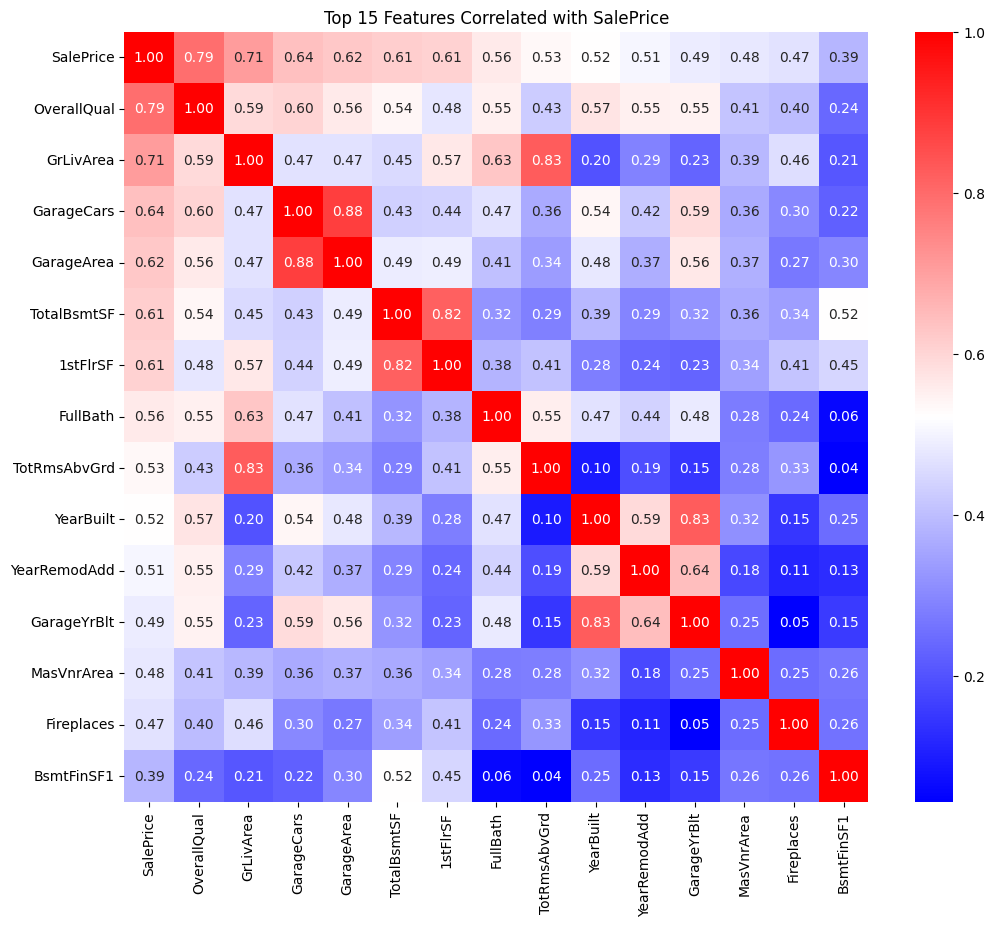

In [435]:
corr = train_df.corr(numeric_only=True)

# Check if 'SalePrice' exists
print("'SalePrice' in correlation matrix:", 'SalePrice' in corr.columns)

# Proceed only if present
if 'SalePrice' in corr.columns:
    top_corr_features = corr['SalePrice'].abs().sort_values(ascending=False).head(15).index

    plt.figure(figsize=(12, 10))
    sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap='bwr', fmt=".2f")
    plt.title("Top 15 Features Correlated with SalePrice")
    plt.show()
else:
    print("'SalePrice' is missing — reload the data before preprocessing!")

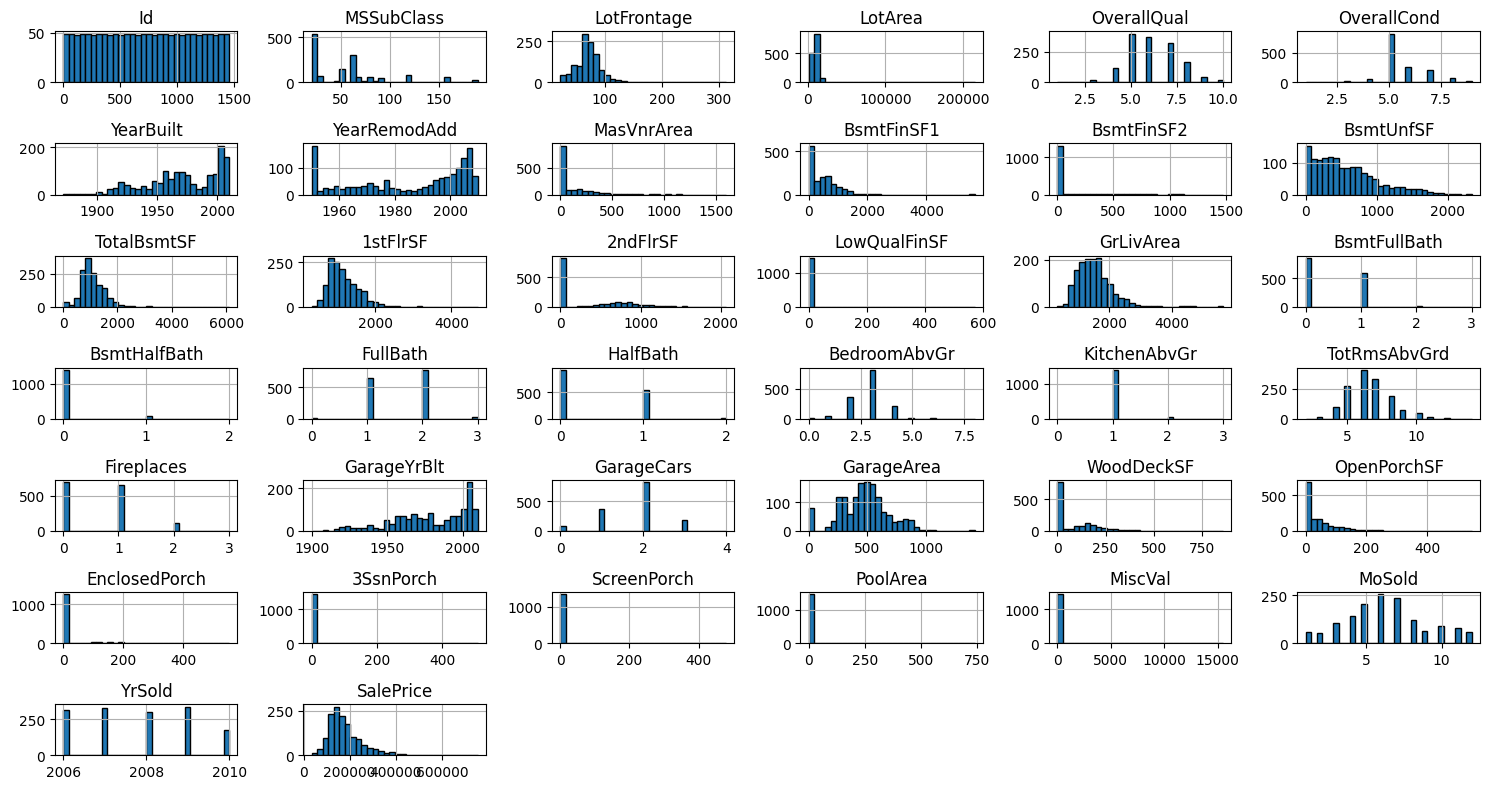

In [437]:
import matplotlib.pyplot as plt
train_df.hist(figsize=(15, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

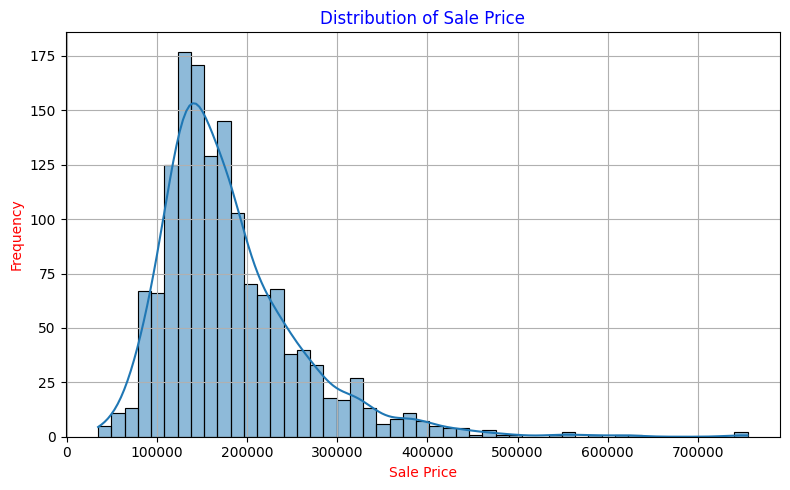

In [438]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price', c='b')
plt.xlabel('Sale Price', c="r")
plt.ylabel('Frequency', c="r")
plt.grid(True)
plt.tight_layout()
plt.show()

In [439]:
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).drop(['Id'], axis=1)
skewness = numeric_features.skew().sort_values(ascending=False)

# Display top 10 most skewed features
print("Top 10 skewed numeric features:\n")
print(skewness.head(10))

Top 10 skewed numeric features:

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
dtype: float64


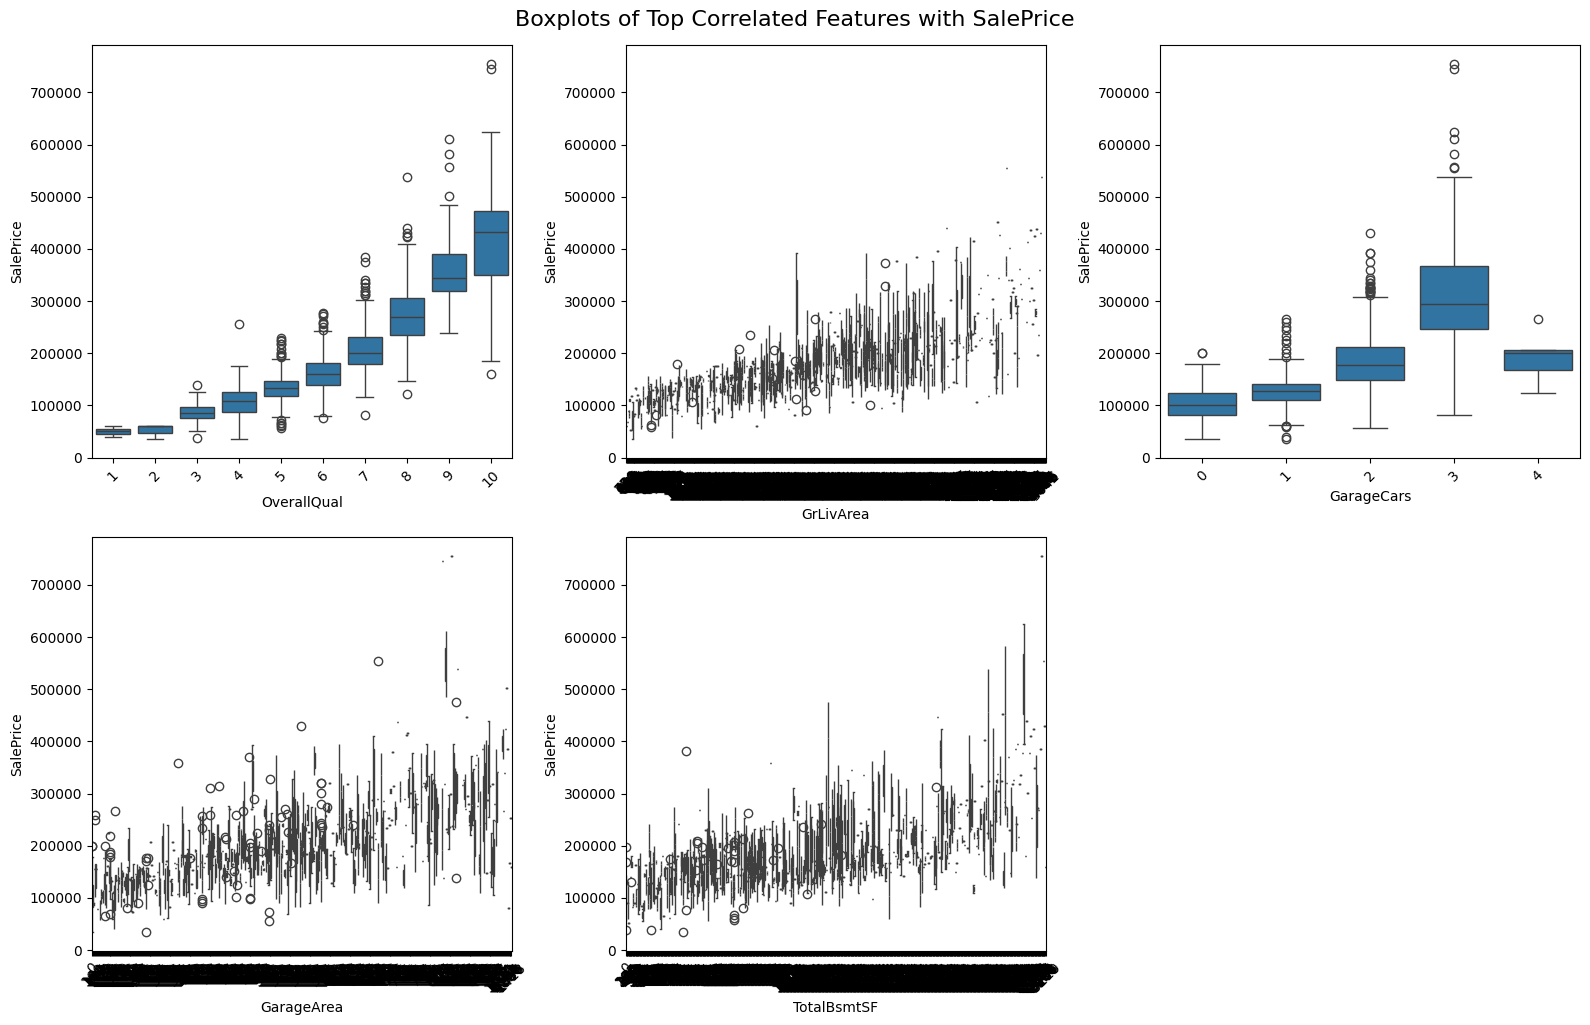

In [440]:
import seaborn as sns

corr_matrix = train_df.corr(numeric_only=True)
top_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(6).index

# Plot boxplots for top features
plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_corr[1:], 1):  # Skip 'SalePrice' itself
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_df, x=feature, y='SalePrice')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Boxplots of Top Correlated Features with SalePrice", fontsize=16, y=1.02)
plt.show()

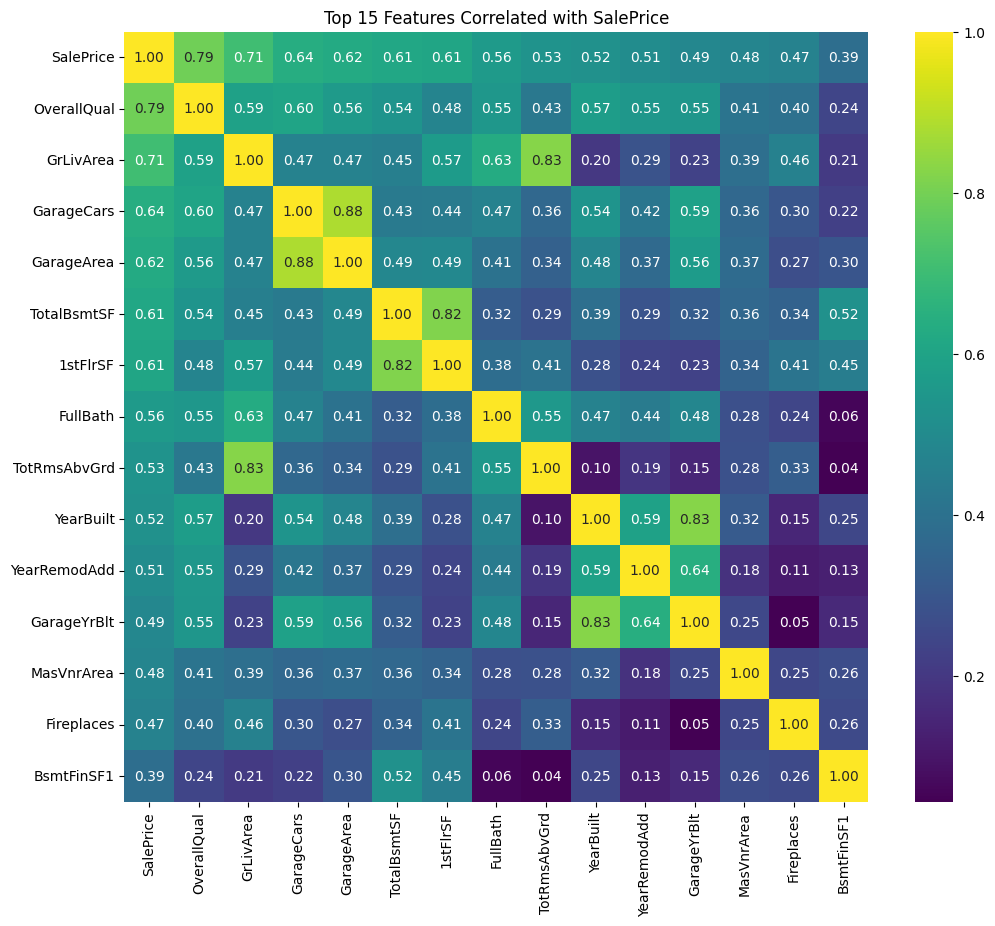

In [441]:
plt.figure(figsize=(12, 10))
top_corr_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(15).index
sns.heatmap(train_df[top_corr_features].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Top 15 Features Correlated with SalePrice")
plt.show()

In [442]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_ids = test_df['Id']

threshold = 0.4
missing_train = train_df.isnull().mean()
missing_test = test_df.isnull().mean()

cols_to_drop = missing_train[missing_train > threshold].index.union(
    missing_test[missing_test > threshold].index
)

train_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [443]:
train_encoded = pd.get_dummies(train_df)
test_encoded = pd.get_dummies(test_df)

train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

In [444]:
X = train_encoded.drop(['SalePrice', 'Id'], axis=1)
y = train_encoded['SalePrice']

In [446]:
import pandas as pd
import numpy as np

#Load original datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_ids = test_df["Id"]

train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

# Check if SalePrice exists
assert "SalePrice" in train_df.columns, "SalePrice column is missing!"

In [447]:
# Drop columns with more than 40% missing values
threshold = 0.4
missing_train = train_df.isnull().mean()
missing_test = test_df.isnull().mean()

cols_to_drop = missing_train[missing_train > threshold].index.union(
    missing_test[missing_test > threshold].index
)

train_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True)

# Fill numeric columns with median
num_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("SalePrice")  # Exclude target
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

# Fill categorical columns with mode
cat_cols = train_df.select_dtypes(include="object").columns
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode().iloc[0])

In [448]:
# Encode both train and test data using one-hot encoding
train_encoded = pd.get_dummies(train_df)
test_encoded = pd.get_dummies(test_df)

# Align train and test sets
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

In [449]:
# Confirm SalePrice still exists
assert "SalePrice" in train_encoded.columns, "SalePrice was dropped accidentally!"

X = train_encoded.drop("SalePrice", axis=1)
y = train_encoded["SalePrice"]

In [486]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
print(f" Validation RMSE: {rmse:.2f}")

 Validation RMSE: 29679.51


In [488]:
X_test = test_encoded[X.columns]

test_preds = model.predict(X_test)


# Create CSV
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": test_preds
})

submission.to_csv("submission.csv", index=False)
print("submission file 'submission.csv' saved successfully!")

submission file 'submission.csv' saved successfully!


In [455]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on validation data
val_preds = model.predict(X_val)

# RMSE
rmse = np.sqrt(mean_squared_error(y_val, val_preds))

# MAE
mae = mean_absolute_error(y_val, val_preds)

# R-squared
r2 = r2_score(y_val, val_preds)

# Print them
print(f" RMSE: {rmse:.2f}")
print(f" MAE: {mae:.2f}")
print(f" R² Score: {r2:.4f}")

 RMSE: 29679.51
 MAE: 18377.71
 R² Score: 0.8852


In [456]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [457]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on validation set
xgb_preds = xgb_model.predict(X_val)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_preds))
xgb_mae = mean_absolute_error(y_val, xgb_preds)
xgb_r2 = r2_score(y_val, xgb_preds)

print(f" XGBoost Results:")
print(f" RMSE: {xgb_rmse:.2f}")
print(f" MAE: {xgb_mae:.2f}")
print(f" R² Score: {xgb_r2:.4f}")

 XGBoost Results:
 RMSE: 25960.71
 MAE: 16079.45
 R² Score: 0.9121


In [458]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation data
rf_preds = rf_model.predict(X_val)

In [459]:
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
rf_mae = mean_absolute_error(y_val, rf_preds)
rf_r2 = r2_score(y_val, rf_preds)

print(f" Random Forest Results:")
print(f" RMSE: {rf_rmse:.2f}")
print(f" MAE: {rf_mae:.2f}")
print(f" R² Score: {rf_r2:.4f}")

 Random Forest Results:
 RMSE: 29265.03
 MAE: 17720.47
 R² Score: 0.8883


In [460]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr_preds = model.predict(X_val)

lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))
lr_mae = mean_absolute_error(y_val, lr_preds)
lr_r2 = r2_score(y_val, lr_preds)

In [461]:
print("\n Model Comparison Summary:")
print(f"Linear Regression - RMSE: {lr_rmse:.2f}, R²: {lr_r2:.4f}")
print(f"XGBoost           - RMSE: {xgb_rmse:.2f}, R²: {xgb_r2:.4f}")
print(f"Random Forest     - RMSE: {rf_rmse:.2f}, R²: {rf_r2:.4f}")


 Model Comparison Summary:
Linear Regression - RMSE: 29679.51, R²: 0.8852
XGBoost           - RMSE: 25960.71, R²: 0.9121
Random Forest     - RMSE: 29265.03, R²: 0.8883


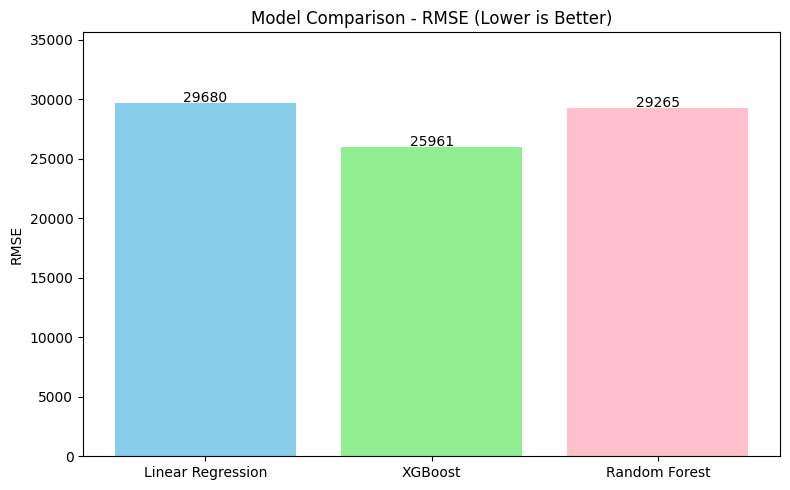

In [462]:
import matplotlib.pyplot as plt
models = ['Linear Regression', 'XGBoost', 'Random Forest']

rmse_scores = [lr_rmse, xgb_rmse, rf_rmse]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_scores, color=['skyblue', 'lightgreen', 'pink'])
plt.ylabel('RMSE')
plt.title('Model Comparison - RMSE (Lower is Better)')
plt.ylim(0, max(rmse_scores) * 1.2)

for i, val in enumerate(rmse_scores):
    plt.text(i, val + 100, f"{val:.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

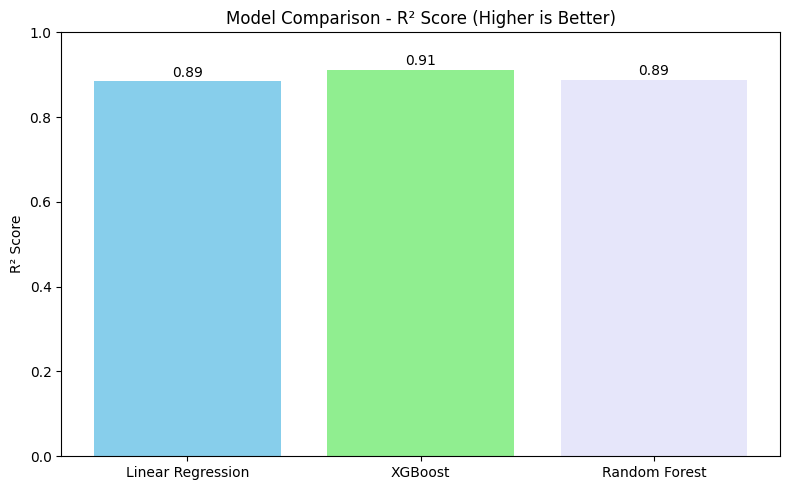

In [463]:
# R² scores
r2_scores = [lr_r2, xgb_r2, rf_r2]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lavender'])
plt.ylabel('R² Score')
plt.title('Model Comparison - R² Score (Higher is Better)')
plt.ylim(0, 1)

# exact vvalue on top
for i, val in enumerate(r2_scores):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [464]:
models = ['Linear Regression', 'XGBoost', 'Random Forest']

rmse_scores = [lr_rmse, xgb_rmse, rf_rmse]
mae_scores = [lr_mae, xgb_mae, rf_mae]
r2_scores  = [lr_r2, xgb_r2, rf_r2]

# Print each model's metrics
print(" Final Accuracy Comparison:\n")
for i in range(3):
    print(f"{models[i]:<18} | RMSE: {rmse_scores[i]:>8.2f} | MAE: {mae_scores[i]:>8.2f} | R² Score: {r2_scores[i]:.4f}")

# Find the best model by lowest RMSE
best_index = rmse_scores.index(min(rmse_scores))
best_model = models[best_index]

print("\n Final Conclusion:")
print(f"The best performing model is *{best_model}*, with the lowest RMSE of {rmse_scores[best_index]:.2f}")

 Final Accuracy Comparison:

Linear Regression  | RMSE: 29679.51 | MAE: 18377.71 | R² Score: 0.8852
XGBoost            | RMSE: 25960.71 | MAE: 16079.45 | R² Score: 0.9121
Random Forest      | RMSE: 29265.03 | MAE: 17720.47 | R² Score: 0.8883

 Final Conclusion:
The best performing model is *XGBoost*, with the lowest RMSE of 25960.71
